<a href="https://colab.research.google.com/github/farhannaushad08/Deep-Learning-Journey/blob/main/CNN_05_Pretrained_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="color:blue; font-size:32px;">Pretrained Models in Deep Learning</h1>

<p>
Definition: A pretrained model is a neural network that has already been trained on a large dataset (e.g., ImageNet)
and can be reused for new tasks. It leverages learned features like edges, textures, and patterns.
</p>

<h2 style="color:darkgreen;">Advantages</h2>
<ul>
<li>Saves training time by reusing learned features.</li>
<li>Achieves high accuracy even with smaller datasets.</li>
<li>Reduces need for extensive labeled data.</li>
<li>No training is required for direct inference—the model predicts based on its learned knowledge.</li>
</ul>

<h2 style="color:darkgreen;">Common Pretrained Models</h2>
<ul>
<li><b>VGG16 / VGG19</b> – Simple, beginner-friendly.</li>
<li><b>ResNet50 / ResNet101</b> – Deep networks with residual connections.</li>
<li><b>InceptionV3 / EfficientNet</b> – Optimized for high accuracy.</li>
<li><b>MobileNet</b> – Lightweight, ideal for mobile or edge devices.</li>
</ul>

<h2 style="color:darkgreen;">Usage Approaches</h2>
<h3>1. Feature Extraction</h3>
<ul>
<li>Freeze convolutional layers of the pretrained model.</li>
<li>Use output as features for a new classifier (e.g., Cat vs Dog).</li>
</ul>

<h3>2. Fine-Tuning</h3>
<ul>
<li>Unfreeze top layers of the pretrained model.</li>
<li>Retrain on your dataset to adapt features to the new task.</li>
</ul>

<h2 style="color:darkgreen;">Example Workflow (Cat vs Dog)</h2>
<ul>
<li>Load <b>ResNet50</b> with pretrained ImageNet weights.</li>
<li>Resize and preprocess images to 224x224.</li>
<li>Use the model to predict classes or as a feature extractor for a custom classifier.</li>
</ul>

<h2 style="color:darkgreen;">Conclusion</h2>
<p>
Pretrained models provide an efficient and effective way to apply deep learning to new tasks
without starting from scratch. They are widely used in computer vision and NLP applications.
</p>


**Load Pretrained Model**

In [1]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load model with pretrained weights
model = ResNet50(weights='imagenet')


**Load and display image**


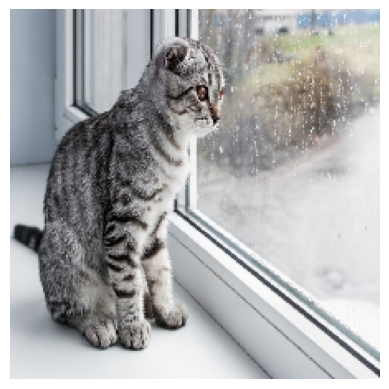

In [2]:
img_path = '/content/cat.jpg'  # replace with your image path
img = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)
plt.axis('off')
plt.show()


**Preprocess image**


In [4]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

**Predict and Decode**

In [5]:
preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted: [('n02123045', 'tabby', np.float32(0.26533422)), ('n04589890', 'window_screen', np.float32(0.18456624)), ('n02124075', 'Egyptian_cat', np.float32(0.10391856))]


In [7]:
decoded = decode_predictions(preds, top=3)[0]

In [8]:
print("Predictions:")
for i, (imagenet_id, label, prob) in enumerate(decoded):
    print(f"{i+1}. {label} : {prob*100:.2f}%")

Predictions:
1. tabby : 26.53%
2. window_screen : 18.46%
3. Egyptian_cat : 10.39%


It appear because ResNet50 is trained on ImageNet, which has 1,000 classes, not just cats and dogs.

The model doesn’t know your dataset categories (“Cat” or “Dog”).

It gives the top 3 predictions from all ImageNet classes, ranked by probability.

So if your image contains a cat, it might predict tabby first (highest probability), but other classes like window_screen can appear if some parts of the image resemble features it learned in those classes.It